# Expedition to Data Science and Machine Learning
## Module 4: Machine Learning with Python
### Lecture 4: Supervised Learning - Classification: Logistic Regression

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Supervised Learning - Classification: Logistic Regression

#### References:
[1] Machine Learning Fundamentals: The Confusion Matrix - https://www.youtube.com/watch?v=Kdsp6soqA7o&ab_channel=StatQuestwithJoshStarmer
<br>[2] Machine Learning Fundamentals: Sensitivity and Specificity: https://www.youtube.com/watch?v=sunUKFXMHGk&ab_channel=StatQuestwithJoshStarmer
<br>[3] ROC and AUC, Clearly Explained! https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer
<br>[4] Machine Learning Fundamentals: Bias and Variance: https://www.youtube.com/watch?v=EuBBz3bI-aA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=5&ab_channel=StatQuestwithJoshStarmer
<br>[5] StatQuest: Logistic Regression - https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer
<br>[6] Logistic Regression Details Pt1: Coefficients: https://www.youtube.com/watch?v=vN5cNN2-HWE&ab_channel=StatQuestwithJoshStarmer
<br>[7] Logistic Regression Details Pt 2: Maximum Likelihood: https://www.youtube.com/watch?v=BfKanl1aSG0&t=163s&ab_channel=StatQuestwithJoshStarmer
<br>[8] Machine Learning Tutorial Python - 8: Logistic Regression (Binary Classification): https://www.youtube.com/watch?v=zM4VZR0px8E&ab_channel=codebasics
<br>[9] Maximum Likelihood, clearly explained!!!: https://www.youtube.com/watch?v=XepXtl9YKwc&ab_channel=StatQuestwithJoshStarmer

#### Import required libraries

In [174]:
import pandas as pd

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

#### Load data
Dataset Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

In [175]:
df = pd.read_csv("Churn.csv")

display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [176]:
print(df.shape)

(3333, 21)


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [178]:
plt.figure(figsize=(30,12))
df[['Churn', 'State']].value_counts().plot(kind='bar')
plt.show()

In [179]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


#### Data Preprocessing

In [180]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Target variable visualization

In [182]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

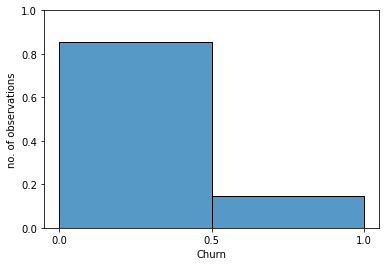

In [183]:
sns.histplot(data=df, x='Churn', stat='probability', binwidth=0.5)
plt.xticks(np.arange(0, 1.1, 0.5))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylabel("no. of observations")
plt.show()

#### Feature and target variable separation

In [184]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Train test separation

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


In [186]:
y_train['Churn'].value_counts()

In [187]:
y_test['Churn'].value_counts()

#### Training: Logistic Regression

In [188]:
model = LogisticRegression()
model = model.fit(X_train, y_train)